# Анализ поведения клиентов «Мегалайн»
Сравнение тарифов «Смарт» и «Ультра»

#Шаг 1. Обзор данных.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [160]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

###Информация о звонках.

In [161]:
calls.info()
calls.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [162]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Данные выглядят адекватно. Таблица содержит 202607 строк.
- Столбец id - индексы строк;
- Столбец call_date содержит даты и должен быть преобразован к типу datetime;
- Столбец user_id связывает данную таблицу с таблицей users;
- В столбце duration указана продолжительность вызовов.

###Информация о траффике.

In [163]:
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
75367,75367,1253_106,806.11,2018-12-01,1253
89892,89892,1303_160,450.25,2018-09-13,1303
87262,87262,1295_106,525.11,2018-09-29,1295
757,757,1003_81,182.79,2018-09-09,1003
16002,16002,1055_460,0.00,2018-08-07,1055


In [164]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Таблица содержит 5 столбцов и 149396 записей.
- В столбце с индексом 0 не имеет имени. Необходимо предположить гипотезу об этих данных или удалить его.
- Столбец id - индексы строк;
- Столбец session_date содержит даты и должен быть преобразован к типу datetime;
- Столбец user_id связывает данную таблицу с таблицей users.

###Информация о сообщениях.

In [165]:
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
18276,1080_222,2018-10-14,1080
9916,1039_572,2018-12-06,1039
5353,1021_509,2018-07-06,1021
69285,1296_27,2018-08-19,1296
48943,1217_218,2018-12-18,1217


In [166]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Таблица содержит 3 столбца и 123036 записей.
- Столбец id - индексы строк;
- Столбец session_date содержит даты и должен быть преобразован к типу datetime;
- Столбец user_id связывает данную таблицу с таблицей users.

###Информация о тарифах.

In [167]:
tariffs.info()
tariffs.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [168]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Таблица содержит 8 столбцов.
- Столбец tariff_name связывает данную таблицу с таблицей users.

###Информация о пользователях.

In [169]:
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
261,1261,46,NaN,Казань,Мадина,Пантелеева,2018-10-30,smart
241,1241,71,NaN,Новосибирск,Инна,Андреенко,2018-05-02,smart
59,1059,47,NaN,Курск,Глеб,Свиридов,2018-04-14,smart
53,1053,64,NaN,Ростов-на-Дону,Ренальд,Фёдоров,2018-09-30,ultra
404,1404,61,NaN,Иркутск,Роберт,Уваров,2018-04-18,smart


In [170]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Таблица содержит 8 столбцов.

- Столбец id - индексы строк;
- Столбцы churn_date(дата прекращения) и reg_date(дата подключения) содержат даты и должны быть преобразованы к типу datetime.

#Шаг 2. Подготовка данных.


###Данные о пользователях.

In [171]:
# Установка столбца user_id в качестве индекса с проверкой на дубликаты
users.set_index(keys='user_id', verify_integrity=True, inplace=True)
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


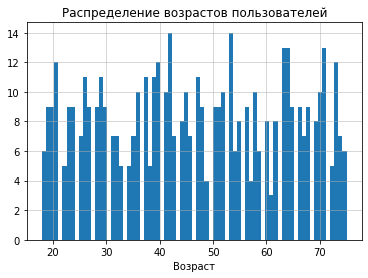

In [172]:
#Визуальная оценка распределения данных по возрасту
users['age'].hist(bins=75)
plt.xlabel('Возраст');
plt.grid(linewidth=0.5)
plt.title('Распределение возрастов пользователей')
plt.show()

Распределение по возрасту выглядит адекватно.

In [173]:
#Приведение столбца churn_date к типу datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_date'].describe(datetime_is_numeric=True)

count                               38
mean     2018-11-13 00:37:53.684210432
min                2018-08-17 00:00:00
25%                2018-10-14 00:00:00
50%                2018-11-24 00:00:00
75%                2018-12-15 12:00:00
max                2018-12-30 00:00:00
Name: churn_date, dtype: object

In [174]:
#Проверка содержания столбца city
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [175]:
#Приведение столбца reg_date к типу datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['reg_date'].describe(datetime_is_numeric=True)

count                              500
mean     2018-06-30 18:57:35.999999744
min                2018-01-01 00:00:00
25%                2018-04-07 12:00:00
50%                2018-07-02 12:00:00
75%                2018-09-29 00:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

In [176]:
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


###Данные о звонках.

In [177]:
# Установка столбца id в качестве индекса с проверкой на дубликаты
calls.set_index(keys='id', verify_integrity=True, inplace=True)
calls.head()

,call_date,duration,user_id
id,,,
1000_0,2018-07-25,0.00,1000
1000_1,2018-08-17,0.00,1000
1000_2,2018-06-11,2.85,1000
1000_3,2018-09-21,13.80,1000
1000_4,2018-12-15,5.18,1000


In [178]:
#Приведение столбца call_date к типу datetime
calls['call_date'].describe()

count         202607
unique           365
top       2018-12-31
freq            1435
Name: call_date, dtype: object

In [179]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['call_date'].describe(datetime_is_numeric=True)

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

In [180]:
#Исследование аномалий в столбце duration
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

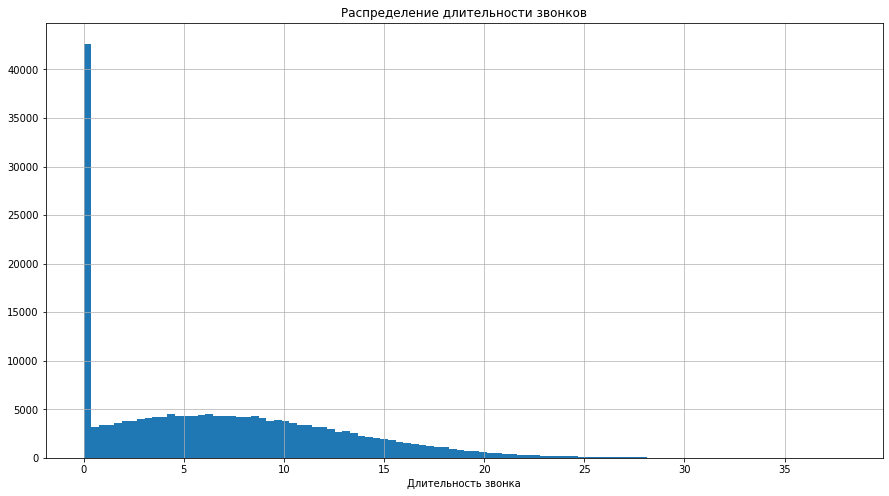

In [181]:
#Визуальная оценка распределения данных
calls['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.7)
plt.title('Распределение длительности звонков')
plt.show()

In [182]:
print('Количество записей с длительность звонка, равной 0 - {} ({:.2%})'.format(len(calls.query('duration == 0')), len(calls.query('duration == 0')) / len(calls)), end='\n\n')


Количество записей с длительность звонка, равной 0 - 39613 (19.55%)



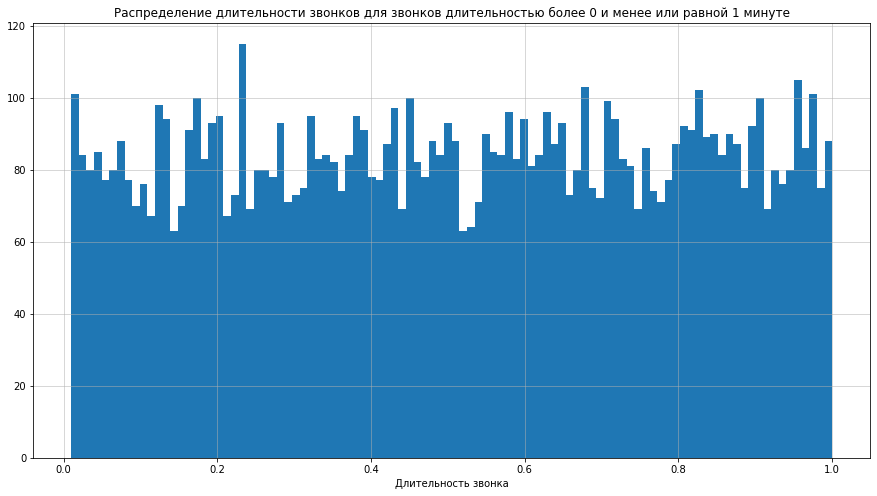

In [183]:
#Визуальная оценка распределения данных
calls.query('0 < duration <= 1')['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков для звонков длительностью более 0 и менее или равной 1 минуте')
plt.show()

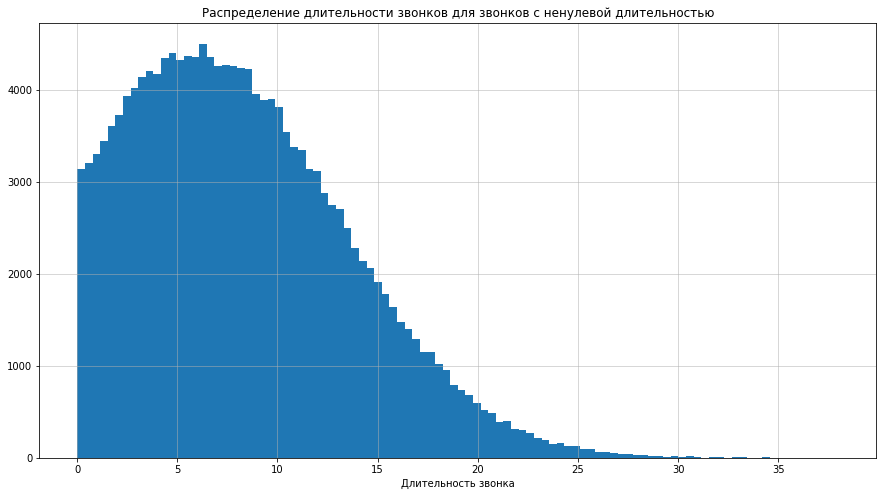

In [184]:
#Визуальная оценка распределения данных
calls.query('duration != 0')['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков для звонков с ненулевой длительностью')
plt.show()

###Данные о сообщениях.

In [185]:
#Установка столбца id в качестве индекса с проверкой на дубликаты
messages.set_index(keys='id', verify_integrity=True, inplace=True)
messages.head()

,message_date,user_id
id,,
1000_0,2018-06-27,1000
1000_1,2018-10-08,1000
1000_2,2018-08-04,1000
1000_3,2018-06-16,1000
1000_4,2018-12-05,1000


In [186]:
#Приведение столбца message_date к типу datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date'].describe(datetime_is_numeric=True)

count                           123036
mean     2018-09-04 15:28:42.227640576
min                2018-01-02 00:00:00
25%                2018-07-09 00:00:00
50%                2018-09-20 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object

###Данные о траффике.

In [187]:
#Удаление столбца с индексом 0
internet.drop(columns=[internet.columns[0]], inplace=True)
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [188]:
#Установка столбца id в качестве индекса с проверкой на дубликаты
internet.set_index(keys='id', verify_integrity=True, inplace=True)
internet.head()

,mb_used,session_date,user_id
id,,,
1000_0,112.95,2018-11-25,1000
1000_1,1052.81,2018-09-07,1000
1000_2,1197.26,2018-06-25,1000
1000_3,550.27,2018-08-22,1000
1000_4,302.56,2018-09-24,1000


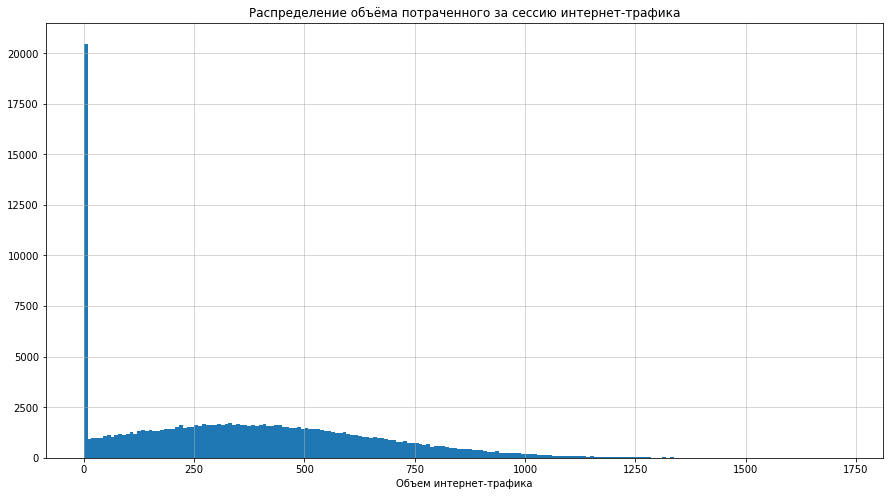

In [189]:
#Визуальная оценка распределения данных
internet['mb_used'].hist(bins=200, figsize=(15, 8))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объёма потраченного за сессию интернет-трафика')
plt.show()

In [190]:
print('Количество записей с объмом трафика сессии, равным 0 - {} ({:.2%})'.format(len(internet.query('mb_used == 0')), len(internet.query('mb_used == 0')) / len(internet)), end='\n\n')

Количество записей с объмом трафика сессии, равным 0 - 19598 (13.12%)



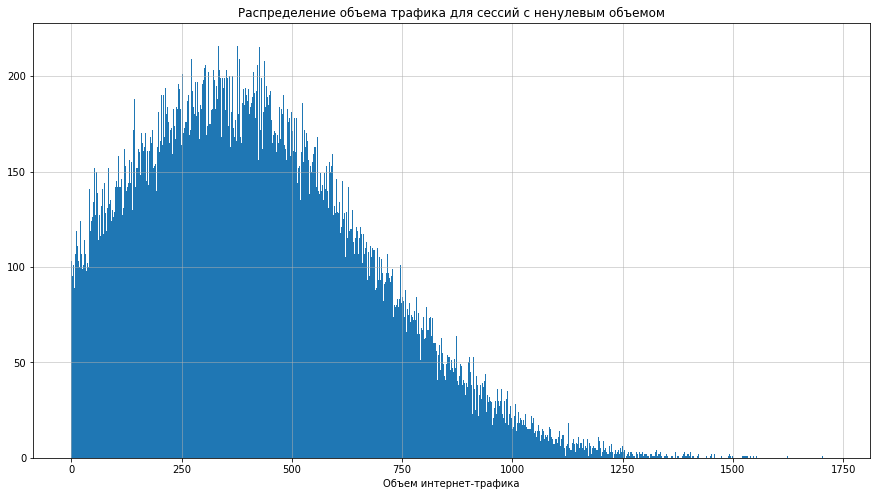

In [191]:
#Визуальная оценка распределения данных
internet.query('mb_used != 0')['mb_used'].hist(bins=1750, figsize=(15, 8))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объема трафика для сессий с ненулевым объемом')
plt.show()

In [192]:
#Расчет количества сессий с трафиком 0 Мб для каждого пользователя
zero_mb_used_pivot = internet.query('mb_used == 0').pivot_table(index='user_id', values='mb_used', aggfunc='count')
zero_mb_used_pivot.columns = ['count_zero']
zero_mb_used_pivot

,count_zero
user_id,
1000,14
1001,14
1002,72
1003,2
1004,22
...,...
1495,10
1496,141
1497,16


In [193]:
#Расчет количества сессий для каждого пользователя
mb_used_pivot = internet.pivot_table(index='user_id', values='mb_used', aggfunc='count')
mb_used_pivot.columns = ['count']
mb_used_pivot

,count
user_id,
1000,211
1001,96
1002,369
1003,104
1004,300
...,...
1495,254
1496,834
1497,121


In [194]:
#Совмещение расчетов
mb_used_pivot = mb_used_pivot.merge(zero_mb_used_pivot, left_on='user_id', right_on='user_id', how='left')
mb_used_pivot

,count,count_zero
user_id,,
1000,211,14.0
1001,96,14.0
1002,369,72.0
1003,104,2.0
1004,300,22.0
...,...,...
1495,254,10.0
1496,834,141.0
1497,121,16.0


In [195]:
#Расчет соотношения количества сессий с объемом трафика 0 Мб к количеству сессий по пользователям
mb_used_pivot['ratio'] = mb_used_pivot['count_zero'] / mb_used_pivot['count']
mb_used_pivot

,count,count_zero,ratio
user_id,,,
1000,211,14.0,0.066351
1001,96,14.0,0.145833
1002,369,72.0,0.195122
1003,104,2.0,0.019231
1004,300,22.0,0.073333
...,...,...,...
1495,254,10.0,0.039370
1496,834,141.0,0.169065
1497,121,16.0,0.132231


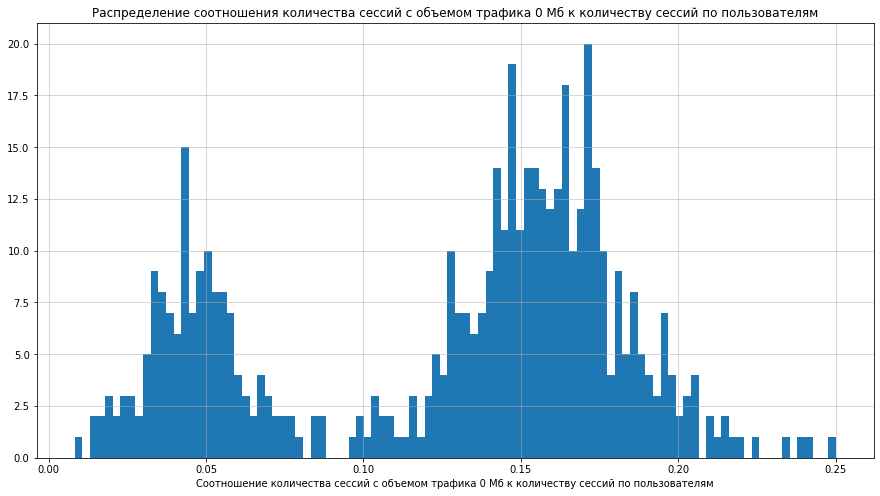

In [196]:
#Визуальная оценка распределения полученных значений
mb_used_pivot['ratio'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Соотношение количества сессий с объемом трафика 0 Мб к количеству сессий по пользователям');
plt.grid(linewidth=0.5)
plt.title('Распределение соотношения количества сессий с объемом трафика 0 Мб к количеству сессий по пользователям')
plt.show()

In [197]:
#Добавление столбца ratio в таблицу users
users = users.merge(mb_used_pivot['ratio'], left_index=True, right_index=True, how='left')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age         500 non-null    int64         
 1   churn_date  38 non-null     datetime64[ns]
 2   city        500 non-null    object        
 3   first_name  500 non-null    object        
 4   last_name   500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   tariff      500 non-null    object        
 7   ratio       494 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 35.2+ KB


In [198]:
#Проверка гипотезы о том, что 2 полученных нормальных распределения относятся к 2 тарифам
users.groupby('tariff')['ratio'].mean()

tariff
smart    0.159255
ultra    0.047244
Name: ratio, dtype: float64

In [199]:
#Приведение столбца session_date к типу datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['session_date'].describe(datetime_is_numeric=True)

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object